In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.DataFrame([[1000],[2000],[3000],[4000],[5000],[6000],[7000],[8000],[9000],[30000],[100000000]] ,columns=['sal'])

In [3]:
dataset

,sal
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000
9,30000


In [8]:
#Check the distribution of the data
# Gaussian Distribution(Normal Distribution)
# Skew Distribution

In [9]:
#To identify if there exists any outlier, check mean and 50% value
#if the value is significantly far, we can conclude OUTLIERS are present
dataset.describe()

,sal
count,1.100000e+01
mean,9.097727e+06
std,3.014887e+07
min,1.000000e+03
25%,3.500000e+03
50%,6.000000e+03
75%,8.500000e+03
max,1.000000e+08


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sal', ylabel='Density'>

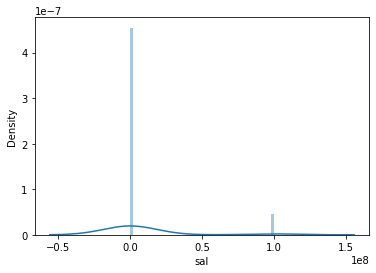

In [10]:
#Use Visual EDA method
sns.distplot(dataset['sal'])

In [11]:
# 1.5 IQR Rule
# Create function

def outlierDetection(columnData):
  #1.Sort the data in ascending order
  sorted(columnData)

  #2. Get Q1 and Q3
  Q1,Q3 = np.percentile(columnData,[25,75])

  #3. Calc IQR
  IQR = Q3 - Q1

  #4. Calc approved lower range
  lr = Q1 - (1.5 * IQR)

  #5. Calc approved upper range
  ur = Q3 + (1.5 * IQR)

  return lr,ur

In [12]:
#Implement Fn

lowerRange,upperRange = outlierDetection(dataset['sal'])
print(lowerRange)
print(upperRange)

-4000.0
16000.0


In [13]:
#Delete the Outlier

processedData = dataset[ (dataset['sal'] >= lowerRange) & (dataset['sal'] <= upperRange) ]
processedData

,sal
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sal', ylabel='Density'>

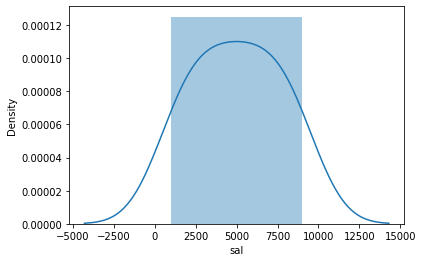

In [14]:
sns.distplot(processedData['sal'])

In [15]:
processedData['sal'].describe()

count       9.000000
mean     5000.000000
std      2738.612788
min      1000.000000
25%      3000.000000
50%      5000.000000
75%      7000.000000
max      9000.000000
Name: sal, dtype: float64